### Experiment #4 (Gaussian MF Exploration)
- Script: it2tsk_gaussian_exploration.py
- Raw data generation command:
```bash
	$ bin/it2tsk_gaussian_exploration
```
- Raw data result: IT2TSK_Gaussian_Exploration.xlsx
- Time required: total +/- 16 minutes

In [1]:

from notebook_resolver import *
import pandas as pd
from src.utils.excel_operation import export_to_excel

file_path = "experiments/IT2TSK_Gaussian_Exploration.xlsx"

df = pd.read_excel(file_path)

result = []

# Group data by 'Sheet Name'
for name, group in df.groupby('Sheet Name'):
    # Sort based on R2 (descending)
    group_sorted = group.sort_values(by='R2', ascending=False)

    # Take top 20%
    top_20pct = group_sorted.head(max(1, int(len(group_sorted) * 0.2)))

    # Calculate range (min dan max) for each requested column
    summary = {
        'Sheet Name': name,
        'UF_min': top_20pct['Uncertainty Factor'].min(),
        'UF_max': top_20pct['Uncertainty Factor'].max(),
        'MSR_min': top_20pct['Min Std Ratio'].min(),
        'MSR_max': top_20pct['Min Std Ratio'].max(),
        'R2_min': top_20pct['R2'].min().round(4),
        'R2_max': top_20pct['R2'].max().round(4),
        'Records_in_Top20%': len(top_20pct),
        'Total_Records': len(group_sorted)
    }
    result.append(summary)

# Combine the results into a DataFrame
df_result = pd.DataFrame(result)
df_result["Sheet_Order"] = df_result["Sheet Name"].str.extract(r"^(\d+)").astype(int)
df_result = df_result.sort_values("Sheet_Order").reset_index(drop=True)

avg_r2 = df_result["R2_max"].mean().round(4)

# Create a summary row
average_row = {
    'Sheet Name': 'Average',
    'UF_min': "",
    'UF_max': "",
    'MSR_min': "",
    'MSR_max': "",
    'R2_min': "",
    'R2_max': avg_r2,
    'Records_in_Top20%': "",
    'Total_Records': ""
}

# Append it to the DataFrame
df_result = pd.concat([df_result, pd.DataFrame([average_row])], ignore_index=True)
# export to excel
export_to_excel(df_result, file_path, sheet_name="uf_msr_summary")

df_result


,Sheet Name,UF_min,UF_max,MSR_min,MSR_max,R2_min,R2_max,Records_in_Top20%,Total_Records,Sheet_Order
0,1.Inside-Outside,0.01,0.11,0.01,0.17,0.9791,0.9797,27,135,1.0
1,2.Round,0.01,0.11,0.01,0.17,0.9916,0.9919,27,135,2.0
2,3.Top_Sirloin,0.01,0.13,0.01,0.07,0.9809,0.9811,27,135,3.0
3,4.Tenderloin,0.01,0.15,0.09,0.17,0.991,0.9922,27,135,4.0
4,5.Flap_meat,0.03,0.23,0.01,0.07,0.9859,0.9861,27,135,5.0
5,6.Striploin,0.05,0.23,0.01,0.17,0.9902,0.9905,27,135,6.0
6,7.Rib_eye,0.01,0.09,0.01,0.17,0.9899,0.9923,27,135,7.0
7,8.Skirt_meat,0.01,0.15,0.01,0.11,0.9939,0.9948,27,135,8.0
8,9.Brisket,0.01,0.15,0.01,0.09,0.9926,0.9932,27,135,9.0
9,10.Clod_Chuck,0.01,0.11,0.01,0.17,0.9563,0.9780,27,135,10.0


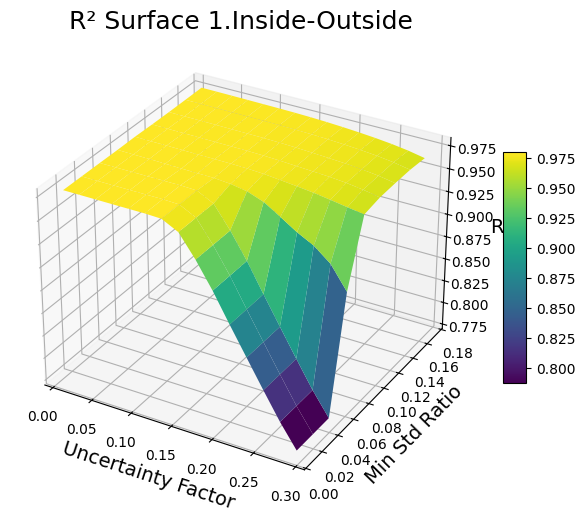

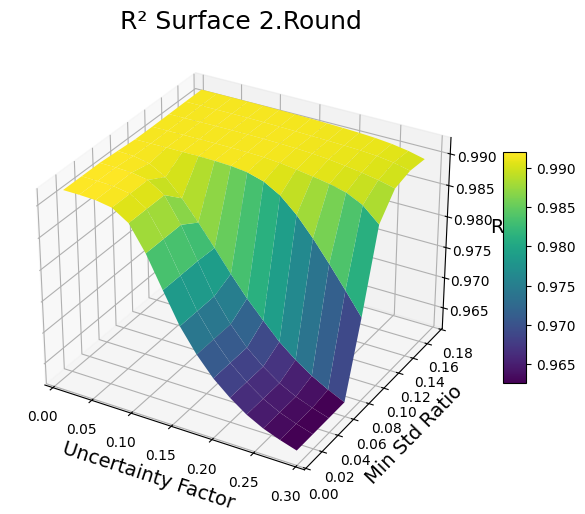

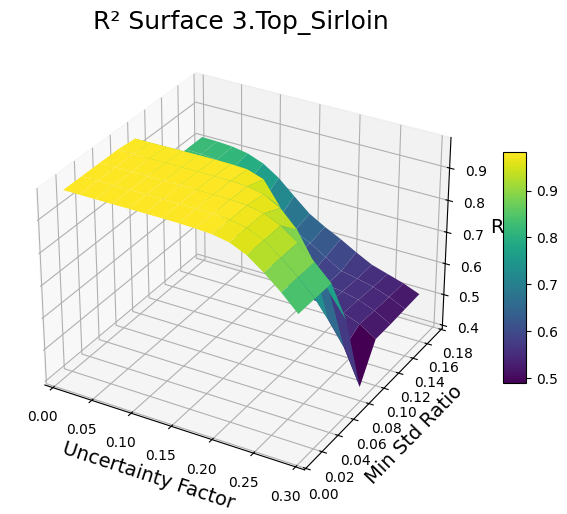

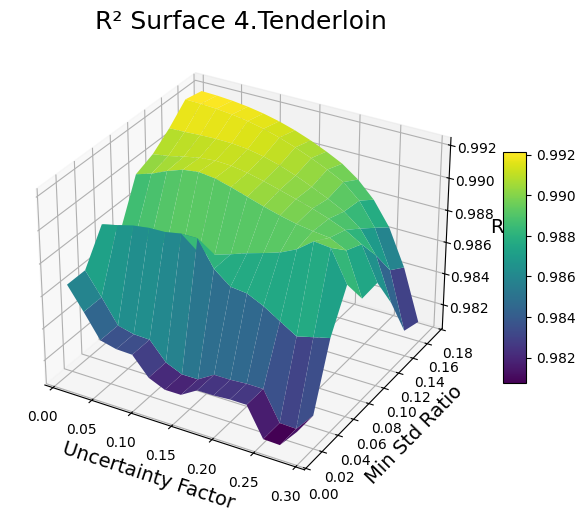

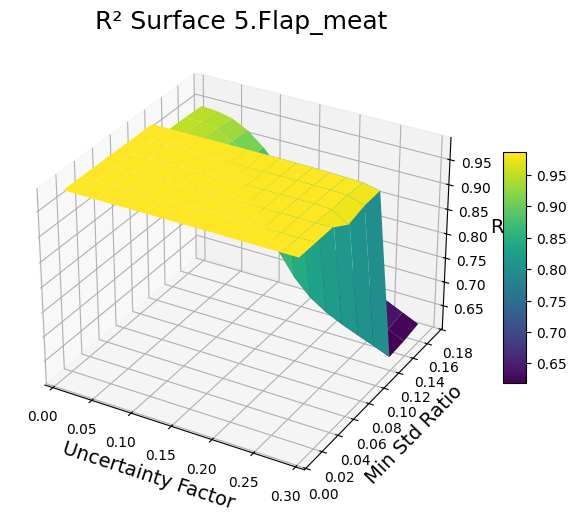

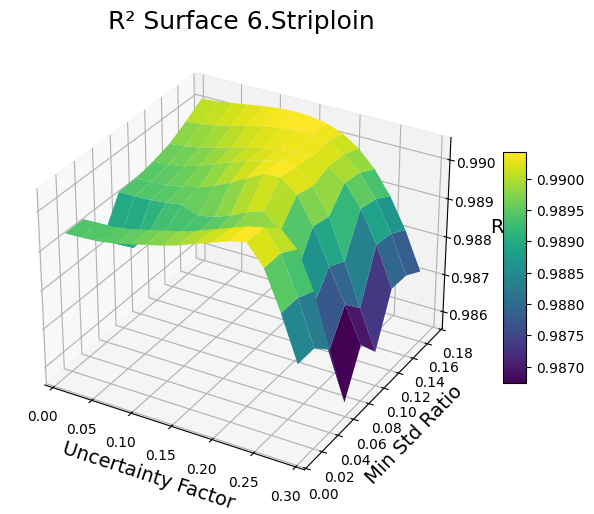

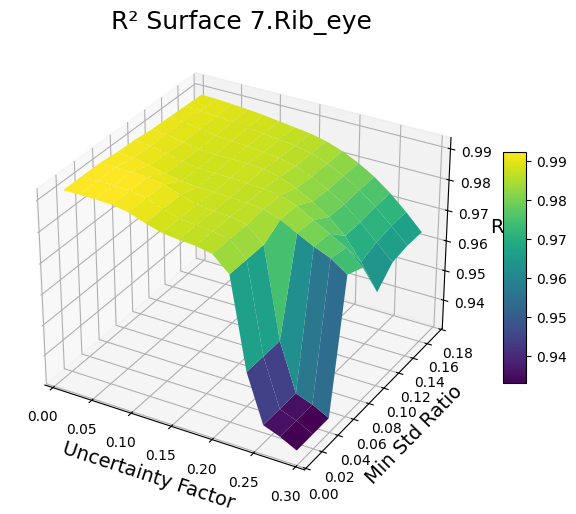

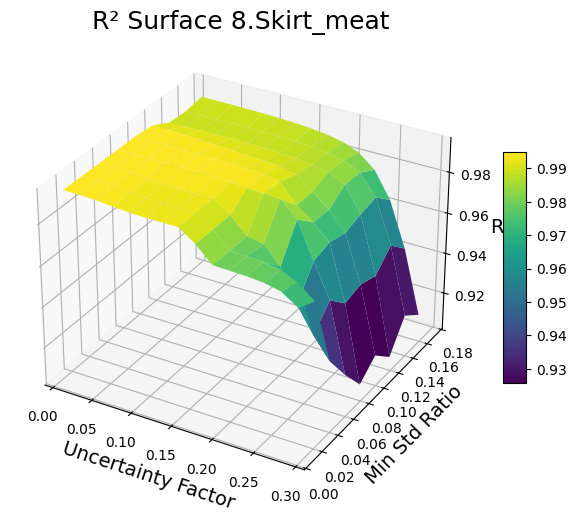

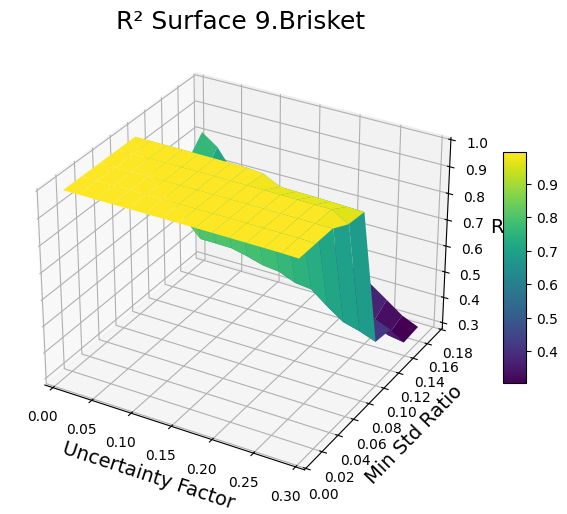

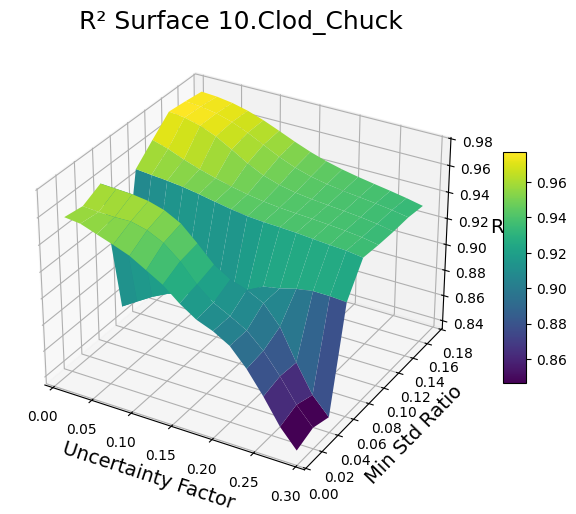

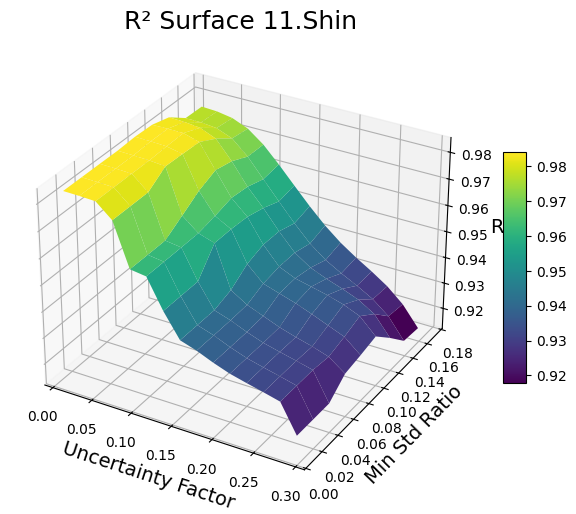

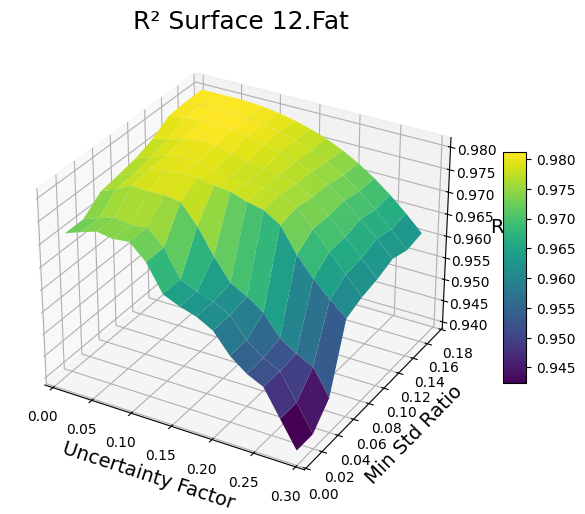

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from src.dataset import WorkSheet

# Create grid for surface plots
def create_surface(df, x_col, y_col, z_col, title, cmap="viridis"):
    # Pivot table for meshgrid
    pivot = df.pivot_table(values=z_col, 
                           index=y_col, 
                           columns=x_col, 
                           aggfunc="mean")
    
    X, Y = np.meshgrid(pivot.columns, pivot.index)
    Z = pivot.values
    
    # Plot surface
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor="none")
    
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.set_zlabel(z_col, fontsize=14)
    ax.set_title(title, fontsize=18)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()

df_raw = pd.read_excel("experiments/IT2TSK_Gaussian_Exploration.xlsx")

for worksheet in WorkSheet:
	worksheet_name = worksheet.value
	df_filtered = df_raw[df_raw["Sheet Name"] == worksheet_name]
	# Keeping only relevant columns
	df_ = df_filtered[["Uncertainty Factor", "Min Std Ratio", "R2", "MSE", "MAE"]]

	# === Generate plots ===
	create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "R2", f"R² Surface {worksheet_name}")
	# create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "MSE", f"MSE Surface {worksheet_names}")
	# create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "MAE", f"MAE Surface {worksheet_names}")

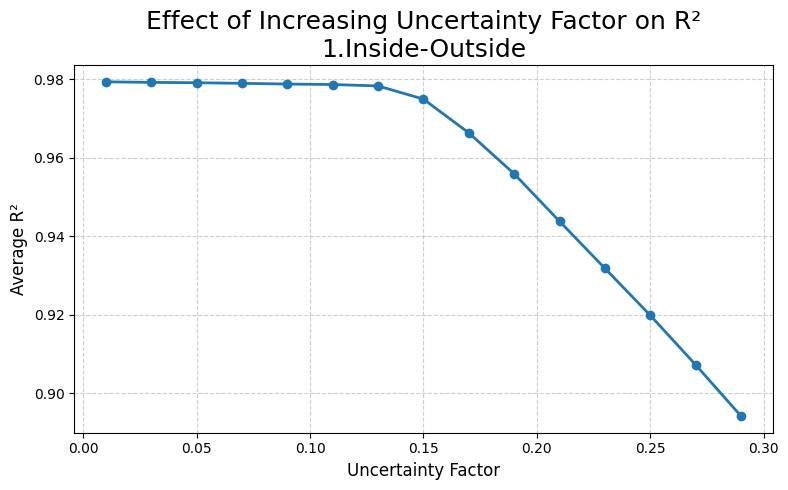

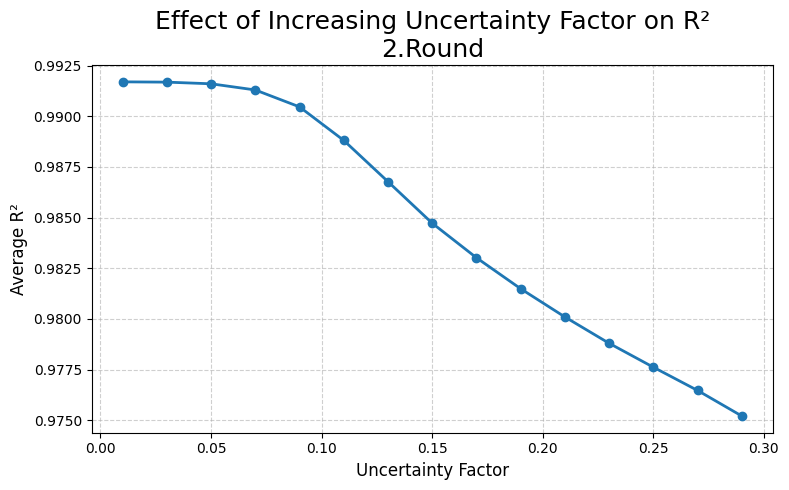

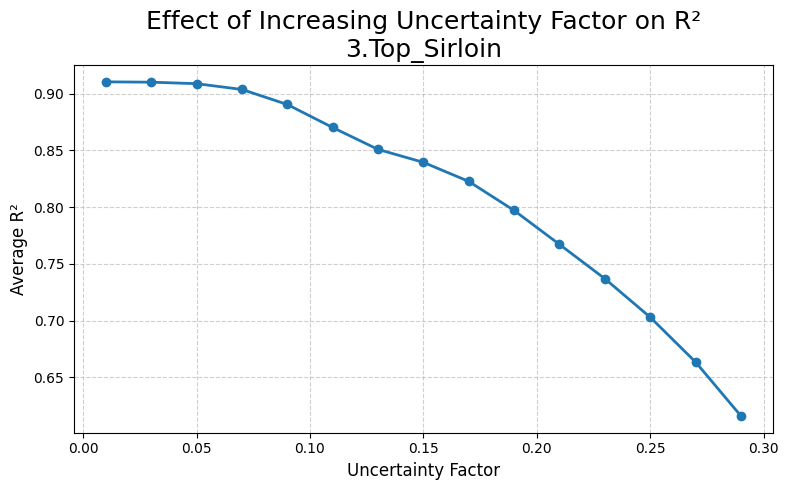

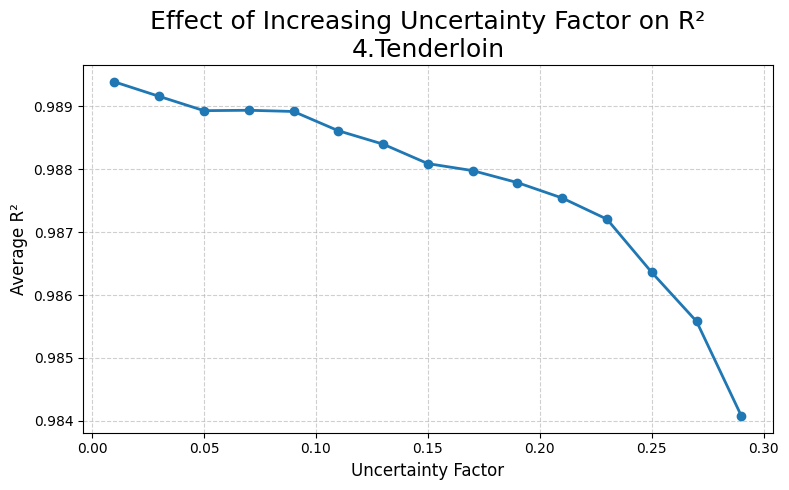

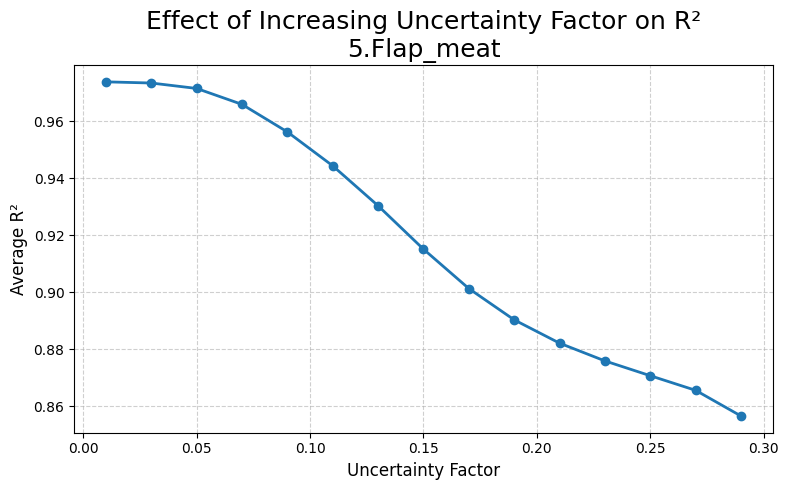

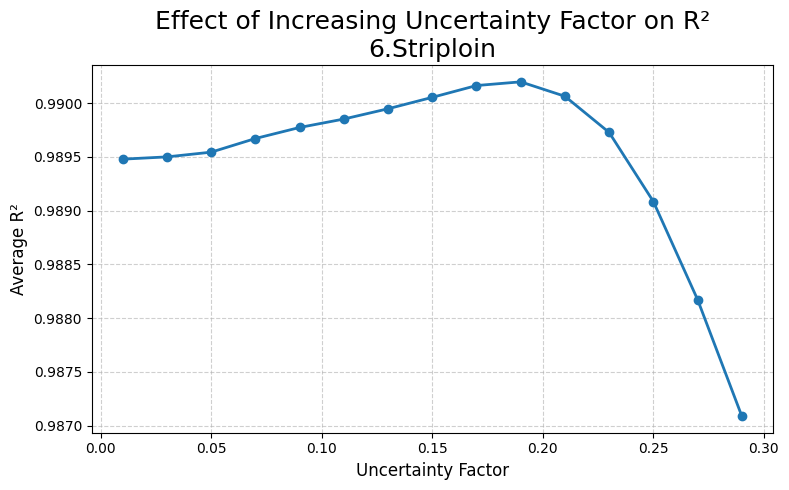

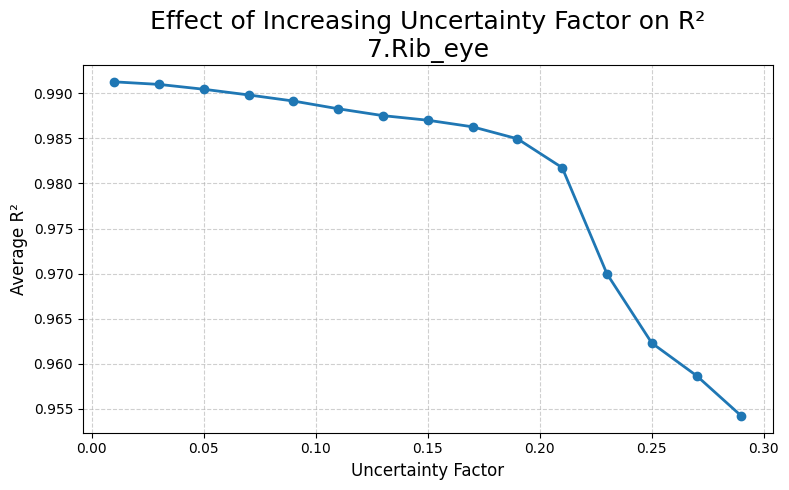

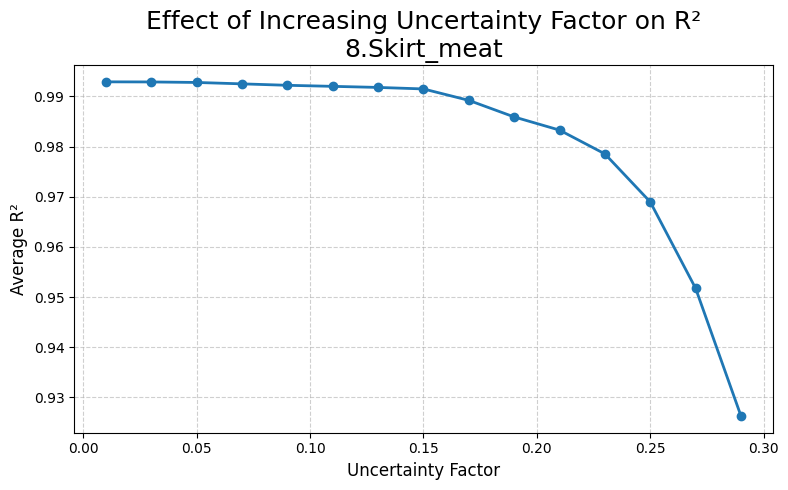

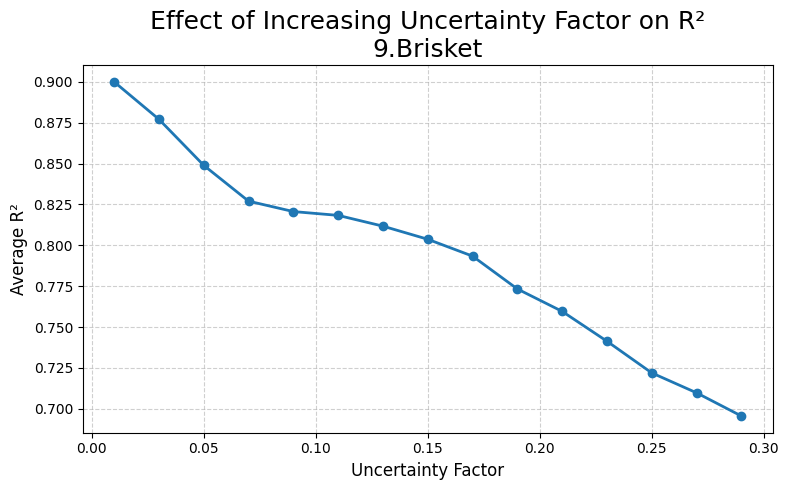

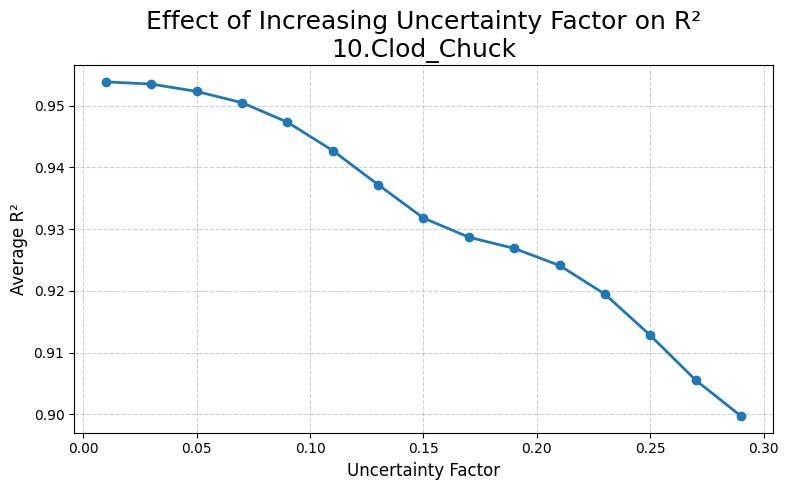

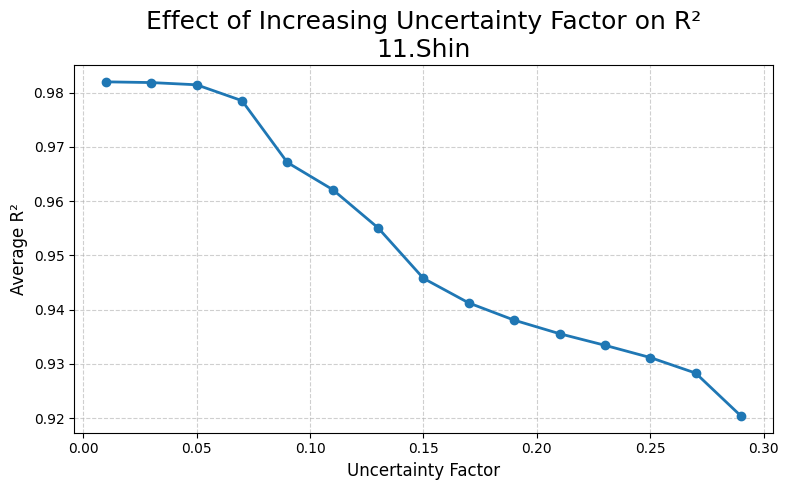

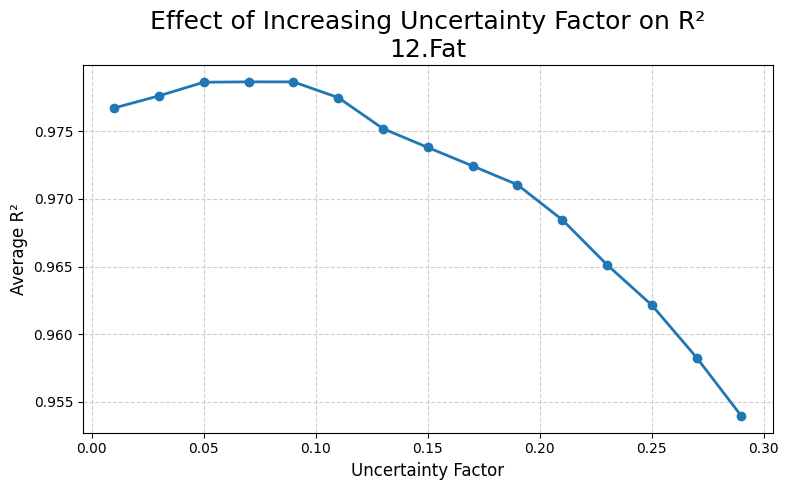

In [3]:

def create_line_chart(sheet_name: str):
	df_filtered = df_raw[df_raw["Sheet Name"] == sheet_name]


	# Gabungkan data berdasarkan Uncertainty Factor (rata-rata semua MSR)
	df_avg = df_filtered.groupby("Uncertainty Factor", as_index=False)["R2"].mean()

	# Plot line chart
	plt.figure(figsize=(8,5))
	plt.plot(df_avg["Uncertainty Factor"], df_avg["R2"], marker='o', linewidth=2, color='tab:blue')

	# Estetika chart
	plt.title(f'Effect of Increasing Uncertainty Factor on R²\n{sheet_name}', fontsize=18)
	plt.xlabel('Uncertainty Factor', fontsize=12)
	plt.ylabel('Average R²', fontsize=12)
	plt.grid(True, linestyle='--', alpha=0.6)
	plt.tight_layout()

	plt.show()

for worksheet in WorkSheet:
	worksheet_name = worksheet.value
	create_line_chart(worksheet_name)
